데이터 로드

In [1]:
# 데이터 출처 링크 : https://github.com/bab2min/corpus/tree/master/sentiment

In [2]:
import re # 정규표현식
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request
from collections import Counter

from sklearn.model_selection import train_test_split

In [3]:
# 전체 데이터에 해당하는 naver_shopping.txt 다운로드 하기
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/naver_shopping.txt", filename="naver_shopping.txt")

('naver_shopping.txt', <http.client.HTTPMessage at 0x7ca487d8f5b0>)

In [4]:
pd.read_table('naver_shopping.txt')

,5,배공빠르고 굿
0,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
...,...,...
199994,2,장마라그런가!!! 달지않아요
199995,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997,5,넘이쁘고 쎄련되보이네요~


In [5]:
pd.read_table('naver_shopping.txt', names=['ratings', 'reviews'])

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [6]:
total_data = pd.read_table('naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head()

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [7]:
print('전체 리뷰 수: ', len(total_data))

전체 리뷰 수:  200000


In [8]:
total_data.columns

Index(['ratings', 'reviews'], dtype='object')

In [9]:
total_data['ratings'].value_counts()

ratings
5    81177
2    63989
1    36048
4    18786
Name: count, dtype: int64

훈련용 데이터와 테스트 데이터 분리

In [10]:
# 긍정 리뷰 추출
condition = (total_data.ratings > 3)
total_data[condition]

,ratings,reviews
0,5,배공빠르고 굿
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
10,5,사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ
14,5,촉감도 좋고 무게감이나 핏도 편합니다
...,...,...
199994,4,전반적으로 어플이나 각종 IOT서비스와의 완성도는 좋음 그러나 서버의 잦은 다운과 ...
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [11]:
# np.select()
# 긍정(평점이 4점, 5점) >>> 1 , 부정(평점이 1점, 2점) >>> 0

np.select([total_data.ratings > 3], [1], default=0)
# np.select(condition, choice, default=0)
# >> condition 조건이 참(True =1) choice, 그렇지 않으면 default(기본값) 0

array([1, 0, 1, ..., 1, 1, 1])

In [12]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data.head()

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [13]:
# 각 열에 대해서 중복 제외 샘플 카운팅 하기

total_data['ratings'].nunique() # number of uniqueness
# 1,2,4,5

4

In [14]:
total_data['reviews'].nunique()

199908

In [15]:
total_data['label'].nunique()
# 1, 0

2

In [16]:
# drop_duplicates()

total_data.drop_duplicates(subset=['reviews'], inplace=True)
# in place of ~ : 을 대신하다 >> inplace=True >> total_data 업데이트
# 'reviews' 열에서 중복인 내용 >> 중복 제거

In [17]:
print('전체 리뷰 수: ', len(total_data))

전체 리뷰 수:  199908


In [18]:
# 결측치 확인

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199908 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  199908 non-null  int64 
 1   reviews  199908 non-null  object
 2   label    199908 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [19]:
total_data.isnull().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [20]:
total_data.isnull().values.any()

False

In [21]:
# 훈련용 데이터 : 테스트 데이터 = 3:1

train_data, test_data =\
train_test_split(total_data, test_size=0.25, random_state=42)

In [22]:
print('훈련용 리뷰의 개수: ', len(train_data))
print('평가용 리뷰의 개수: ', len(test_data))

훈련용 리뷰의 개수:  149931
평가용 리뷰의 개수:  49977


In [23]:
# 모델링(train_data)

train_data.head()

,ratings,reviews,label
59666,2,사이즈를 3센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많...,0
12433,2,ㅂ불만족.. 빗이 아픔 .. 멍이피부에 빗질못해주겟네요,0
146516,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요. 혹시나해서 다시 빼보니 물이 다시 ...,0
158109,5,적당하고 만족합니다,1
70219,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0


In [24]:
# EDA (탐색적 데이터 분석)

train_data['label'].value_counts()

label
1    75013
0    74918
Name: count, dtype: int64

<Axes: xlabel='label'>

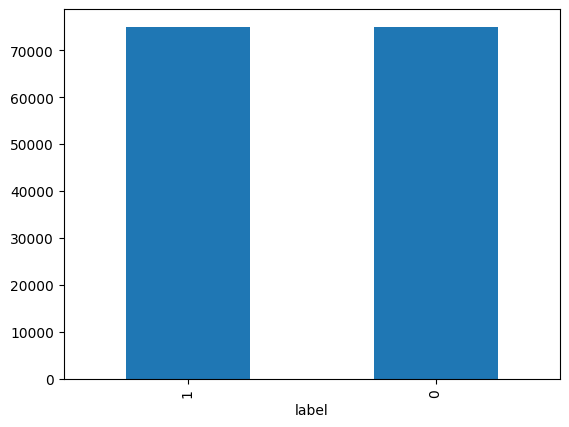

In [25]:
train_data['label'].value_counts().plot(kind='bar')

In [26]:
train_data.groupby('label').size()

label
0    74918
1    75013
dtype: int64

In [27]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74918
1,1,75013


실전 모델링_딥러닝 활용 감성분석

In [28]:
!pip install transformers

In [29]:
# 허깅페이스 모델 예제
# https://huggingface.co/matthewburke/korean_sentiment

from transformers import pipeline
classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")
custom_tweet = "영화 재밌다."
preds = classifier(custom_tweet, return_all_scores=True)
is_positive = preds[0][1]['score'] > 0.5


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [30]:
print('긍정 여부: ', is_positive)

긍정 여부:  True


In [31]:
print('스코어 점수 확인: ',  preds[0][1]['score'] )

스코어 점수 확인:  0.9731518626213074


In [32]:
# 평가용 데이터 (test_data)

test_data.head(3)

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1


In [33]:
def pred_sentiment(text):
    preds = classifier(text, return_all_scores=True)
    if preds[0][1]['score'] > 0.5:
        return 1
    else:
        return 0

In [34]:
# text = '피부에 뾰루지가 많이 올라와요'
text = '배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요	'

In [35]:
pred_sentiment(text)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


1

In [36]:
from tqdm import tqdm
tqdm.pandas()

In [37]:
test_data

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1
72927,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0
...,...,...,...
42438,2,연결해서 쓰려고 3단으로 2개 주문했는데..연결부위 맞추기가 넘 힘드네여 거기다 세...,0
65471,2,허리는 너무크고 종아리는 꽉 끼어서 약간불편해 하네요 아들이 그래도 따뜻하다며 잘입...,0
192593,5,샵에 가서 받았었는데 이거 구매하고 집에서 셀프로 하는데 넘나 좋으네요^^* 세트로...,1
47486,4,가격도 착하고 다좋은데 조금얇은감이있네요 넓이도 조금커서 살짝헐렁거리지만 그래도 만...,1


In [38]:
# test_data 상위 1,000 개만 복사
test_data_sample = test_data[:1000].copy()

In [39]:
test_data_sample

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1
72927,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0
...,...,...,...
148745,4,좋아요 딱 맞아요 배송 일주일,1
138045,5,빨간색 검은색 샀어요 있는 것만으로도 든든하네요 잘 쓸께요,1
160462,5,설치 꼼꼼하게 잘해주셨고~ 저렴한 가격에 잘 설치했어요,1
24513,5,마블 구매했다가 품절이라 그레이로 변경했는데 그레이도 넘 이쁘네여~! 가격도 저렴하...,1


In [40]:
test_data_sample['pred'] = test_data_sample['reviews'].progress_apply(pred_sentiment)
# progress_apply(pred_sentiment) : tqdm 제공하는 함수. pred_sentiment 함수에 데이터를 reivews 데이터를 적용하는 과정 보여줌

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s]


In [41]:
test_data_sample

,ratings,reviews,label,pred
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0,0
125080,1,피부에 뾰루지가 많이 올라와요,0,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1,1
72927,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.,1,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0,0
...,...,...,...,...
148745,4,좋아요 딱 맞아요 배송 일주일,1,1
138045,5,빨간색 검은색 샀어요 있는 것만으로도 든든하네요 잘 쓸께요,1,1
160462,5,설치 꼼꼼하게 잘해주셨고~ 저렴한 가격에 잘 설치했어요,1,1
24513,5,마블 구매했다가 품절이라 그레이로 변경했는데 그레이도 넘 이쁘네여~! 가격도 저렴하...,1,1


In [42]:
# 정확도 측정

(test_data_sample['pred'] == test_data_sample['label']).sum()

876

In [43]:
len(test_data_sample)

1000

In [44]:
(test_data_sample['pred'] == test_data_sample['label']).sum() / len(test_data_sample)

0.876

In [45]:
def accuracy_score(df):
    correct = (test_data_sample['pred'] == test_data_sample['label']).sum()
    total = len(test_data_sample)
    return correct / total

In [46]:
accuracy_score(test_data_sample)

0.876

In [47]:
acc = accuracy_score(test_data_sample)
print('정확도(%): ', acc*100)

정확도(%):  87.6


DEMO

In [48]:
# STREAMLIT, GRADIO

!pip install gradio==3.42.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 24.3 MB

In [49]:
import gradio as gr

In [50]:
def pred_sentiment_text(text):
    preds = classifier(text, return_all_scores=True)
    if preds[0][1]['score'] > 0.5:
        return '긍정'
    else:
        return '부정'

In [51]:
text = '참 잘했다'

In [52]:
text = '아이고, 또 지각했어. 참 잘했다잉'

In [53]:
 pred_sentiment_text(text)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


'부정'

In [54]:
preds[0][1]['score']

0.9731518626213074

In [55]:
iface = gr.Interface(fn=pred_sentiment_text,  # 여기다가 사용할 함수 입력
                    inputs=gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요.'),
                    outputs='text',
                    title='한글 감성 분석',
                    description='분석한 결과를 긍정(positive), 부정(negative)인지 알려줘요.'
                    )


iface.launch(share=True)

#  https://4fa18f0de6e767c7f0.gradio.live

<ipython-input-55-cf30765d4d5b>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요.'),
<ipython-input-55-cf30765d4d5b>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요.'),
<ipython-input-55-cf30765d4d5b>:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요.'),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.42.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://82a32a9a1512b920f5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


실전 모델링(텍스트 요약기)

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model =AutoModelForSeq2SeqLM.from_pretrained('eenzeenee/t5-base-korean-summarization')
tokenizer = AutoTokenizer.from_pretrained('eenzeenee/t5-base-korean-summarization')

prefix = 'summarize'

sample="""
대학교 축제 현장에서 술에 취해 행패를 부린 30대 남성이 경찰에 붙잡혔다.
30일 뉴스1에 따르면 이날 광주 동부경찰서는 폭행 혐의로 30대 남성 A씨를 불구속 입건했다.
A씨는 지난 29일 오후 11시쯤 광주 조선대학교 축제 현장에서 술에 취해 50대 B씨를 밀친 혐의를 받고 있다.
가수 싸이 공연을 보던 A씨는 '싸이가 싫다'며 불만을 표출했고 B씨 쪽으로 담배꽁초를 던지면서 시비가 붙었다. B씨가 항의하자 A씨는 상의를 벗은 채 행패를 부린 것으로 전해졌다.
이 과정에서 '싸이 경호원과 시민이 싸움하고 있다'는 신고가 접수되기도 했다. 하지만 이는 A씨 체형 때문에 빚어진 오해로 알려졌다.
경찰은 A씨를 상대로 정확한 사건 경위를 조사할 방침이다.
"""

inputs = [prefix + sample]

inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors='pt')
# max_length=512 최대 토큰 길이, truncation=True 최대 길이 초과시 잘라냄
# return_tensors='pt' 결과를 pytorch 텐서 형식으로 반환
output = model.generate(**inputs, num_beams=3, do_sample=True, min_length=10, max_length=64)
# **inputs : 이전 단계에서 생성된 입력(텐서) 전달, num_beams=3 (beam search)로 탐색(샘플링해서)
# beam search 다수 후보 탐색, 최적의 출력 값 찾는 알고리즘
decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
# special_tokens : [cls],[sos],[eos],[sep]

result = nltk.sent_tokenize(decoded_output.strip())
# sent_tokenize() : sentence(문장) 단위 별로 토큰화 >> 양쪽 공백 제거
print(result)

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


['대학교 축제 현장에서 술에 취해 행패를 부린 30대 남성이 경찰에 붙잡혔고 경찰은 정확한 사건 경위를 조사할 방침이다.']


In [58]:
result[0]

'대학교 축제 현장에서 술에 취해 행패를 부린 30대 남성이 경찰에 붙잡혔고 경찰은 정확한 사건 경위를 조사할 방침이다.'

In [59]:
# 문서 자동화

def summarize(sample):
    prefix = 'summarize'
    inputs = [prefix + sample]
    inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors='pt')
    output = model.generate(**inputs, num_beams=3, do_sample=True, min_length=10, max_length=64)
    decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    result = nltk.sent_tokenize(decoded_output.strip())[0]
    return result

In [60]:
text='''
최근 레트로 패션이 유행하면서 유선 이어폰과 CD를 통해 음악을 감상하는 CD플레이어의 판매량이 급증하고 있다.
오늘의집이 지난 20일부터 26일까지 CD플레이어 판매량을 분석한 결과 전주 대비 430% 증가했다고 30일 발표했다. 직전 4주간 판매된 거래액을 합친 금액보다 많은 수치다. 구매자 수는 한 주 간 10배 증가했다.
‘CD플레이어’ 키워드 검색량은 300% 증가했다. ’CDP’와 ‘휴대용 CD플레이어’ 등 관련 키워드를 검색하는 고객도 큰 폭으로 늘었다. 오늘의집 관계자는 “지금까진 벽걸이형 CD플레이어와 스탠드형 CD플레이어 등이 인테리어의 한 요소로 인기가 높았다”며 “최근에는 포터블 CD플레이어에 대한 관심이 급상승했다”고 설명했다.
'''


In [61]:
text = '''
롯데백화점은 쇼핑의 미래 가치를 결집한 새로운 쇼핑 플랫폼인 '타임빌라스'를 선보인다고 30일 밝혔다. 타임빌라스 1호점인 '타임빌라스 수원'은 백화점과 쇼핑몰의 강점을 결합한 '컨버전스형 프리미엄 쇼핑몰'이다. 백화점이 가진 프리미엄 테넌트와 서비스를 쇼핑몰에 적용하고, 쇼핑몰의 다양성을 백화점에도 반영해 쇼핑의 새로운 스탠다드를 선보인다는 구상이다.
타임빌라스는 시계 바늘 등을 시각화한 '선'과 '면'으로 로고를 디자인해 고객들에게 끊임없이 새로운 라이프스타일을 제안하고자 하는 의지를 담아냈다.
2014년 수원에 개점한 롯데몰은 특례시로 성장한 수원시의 위상에 따라 지역을 대표할 랜드마크 쇼핑 플랫폼이 필요하다고 판단, 점포를 개장한 지 약 10년 만에 타임빌라스로 전환하게 됐다.
타임빌라스 수원은 '시간도 머물고 싶은 공간'이라는 철학 아래 새롭게 탈바꿈 중이다. 2년여 간의 기획 및 준비 과정을 거쳐 지난해 10월부터 새 단장에 박차를 가하고 있다. 외관은 물론 내부 인테리어, MD 콘텐츠, 서비스까지 전 부분에 걸친 혁신을 추진 중이다. 고객의 시간을 더욱 가치 있게 만들겠다는 목표로 'Time You Deserve'라는 새로운 기치도 내걸었다.
'''

In [62]:
result = summarize(text)
print(result)

롯데백화점은 백화점과 쇼핑몰의 강점을 결합한 컨버전스형 프리미엄 쇼핑몰인 타임빌라스를 선보인다고 밝혔다.


In [63]:
iface = gr.Interface(fn=summarize,  # 여기다가 사용할 함수 입력
                    inputs=gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력해 주세요.'),
                    outputs='text',
                    title='한글 문서요약 봇',
                    description='텍스트를 입력하면 문서를 싹 다 요약해줘요.'
                    )


iface.launch(share=True)

# https://4bca620cac21448daa.gradio.live

<ipython-input-63-787baa73f515>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력해 주세요.'),
<ipython-input-63-787baa73f515>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력해 주세요.'),
<ipython-input-63-787baa73f515>:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력해 주세요.'),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.42.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://f13f0985b27fe8ef38.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


 참고

In [64]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [65]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

# \w, ^-----$, [^a-zA-Z가-힣]

 was wondering anyone out there could enlighten this car.


In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
from nltk.corpus import stopwords
# corpus : 말뭉치, stopwords 불용어
from nltk.tokenize import word_tokenize
# word_tokenize: 단어(단위)로 토큰으로 만들어 주는 패키지

In [68]:
# 불용어(stopwords) 처리

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
    if word not in stop_words:
        result.append(word)

print('불용어 제거 전 :',word_tokens)
print('불용어 제거 후 :',result)


불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [69]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 30.4 MB/s eta 0:00:00


In [70]:
from konlpy.tag import Okt

In [71]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
# 공백을 기준 분리 (중복 배제해서)
word_tokens = okt.morphs(example)
# morphs: 형태소 분석

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens)
print('불용어 제거 후 :',result)


불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


In [72]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."


In [73]:
# 문장 토큰화
sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [74]:
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []

    for word in tokenized_sentence:
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] += 1
    preprocessed_sentences.append(result)
print(preprocessed_sentences)


[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
